### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
female_data=pd.read_csv('female_complete.csv')

In [3]:
female_data['Medal'] = female_data['Medal'].fillna('NA')

In [4]:
male_data=pd.read_csv('male_gdp.csv')
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [5]:
female_swim = female_data[female_data['Sport'] == 'Football']

In [6]:
female_swim['Sport'].describe

<bound method NDFrame.describe of 5465    Football
5466    Football
5467    Football
5468    Football
5469    Football
          ...   
6348    Football
6349    Football
6350    Football
6351    Football
6352    Football
Name: Sport, Length: 888, dtype: object>

In [7]:
female_swim['Medal'].describe

<bound method NDFrame.describe of 5465    NA
5466    NA
5467    NA
5468    NA
5469    NA
        ..
6348    NA
6349    NA
6350    NA
6351    NA
6352    NA
Name: Medal, Length: 888, dtype: object>

In [8]:
female_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 5465 to 6352
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      888 non-null    int64  
 1   Unnamed: 0_x    888 non-null    int64  
 2   ID              888 non-null    int64  
 3   Name            888 non-null    object 
 4   Sex             888 non-null    object 
 5   Age             888 non-null    float64
 6   Height          888 non-null    float64
 7   Weight          888 non-null    float64
 8   NOC             888 non-null    object 
 9   Games           888 non-null    object 
 10  Year            888 non-null    int64  
 11  Season          888 non-null    object 
 12  City            888 non-null    object 
 13  Sport           888 non-null    object 
 14  Event           888 non-null    object 
 15  Medal           888 non-null    object 
 16  Team            888 non-null    object 
 17  Unnamed: 0_y    888 non-null   

In [9]:
# Extract Response and Predictors
y = pd.DataFrame(female_swim["Medal"]).astype('category')
X = pd.DataFrame(female_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [10]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (666, 1) (666, 6)
Test Set  : (222, 1) (222, 6)


In [11]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [12]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
6311,28.0,61.000000,164.0,2.660000e+12,6.370030e+07,41758.045096,NA
5915,30.0,60.000000,158.0,1.661996e+10,1.615036e+07,1029.076649,NA
6249,22.0,53.000000,165.0,2.410000e+11,1.095514e+07,21998.804032,NA
5720,17.0,49.000000,157.0,7.700000e+11,1.069956e+08,7196.558759,NA
5572,36.0,58.000000,171.0,1.230000e+13,2.928053e+08,42007.436628,Gold
...,...,...,...,...,...,...,...
5477,28.0,62.000000,170.0,5.440000e+11,9.519374e+06,57146.614893,NA
6240,26.0,73.000000,177.0,1.550000e+12,3.324577e+07,46622.468366,NA
5602,29.0,59.745763,162.0,2.470000e+12,2.005610e+08,12315.456192,NA
6331,25.0,58.000000,167.0,1.120000e+13,1.378665e+09,8123.800923,NA


In [13]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        632
Bronze     86
Gold       86
Silver     84
Name: Medal, dtype: int64


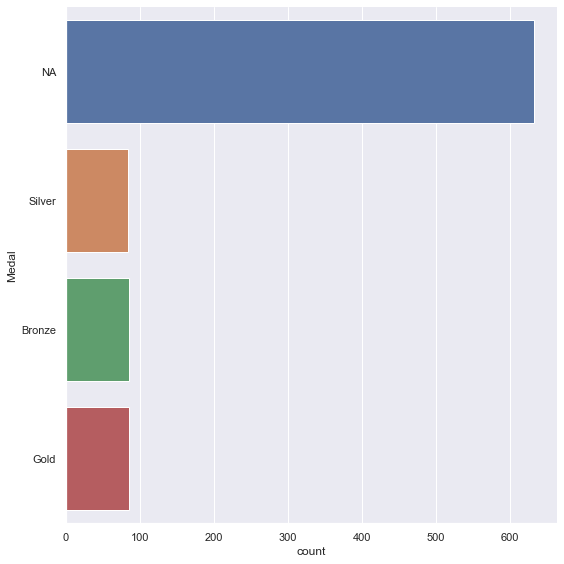

In [14]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(female_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(female_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = female_swim, kind = "count", height = 8)

In [15]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(666, 6) (666, 1)


In [16]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(1908, 6) (1908, 1)


In [17]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,28.000000,61.000000,164.000000,2.660000e+12,63700300.0,41758.045096,NA
1,30.000000,60.000000,158.000000,1.661996e+10,16150362.0,1029.076649,NA
2,22.000000,53.000000,165.000000,2.410000e+11,10955141.0,21998.804032,NA
3,17.000000,49.000000,157.000000,7.700000e+11,106995583.0,7196.558759,NA
4,36.000000,58.000000,171.000000,1.230000e+13,292805298.0,42007.436628,Gold
...,...,...,...,...,...,...,...
1903,26.621779,64.378221,169.865336,5.140000e+11,9903122.0,51902.824180,Silver
1904,28.014202,64.140629,170.985798,1.700000e+12,192979029.0,8809.247351,Silver
1905,23.465731,64.706854,171.706854,5.140000e+11,9903122.0,51902.824180,Silver
1906,20.656205,56.031179,172.000000,1.700000e+12,192979029.0,8809.247351,Silver


In [18]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
5976,26.0,76.0,178.0,6.690000e+11,1.847385e+08,3621.335846
5735,31.0,63.0,173.0,1.850000e+11,4.692700e+06,39422.933492
5765,19.0,45.0,160.0,2.080000e+11,1.503474e+08,1383.462659
6054,18.0,48.0,152.0,2.410000e+11,1.095514e+07,21998.804032
5674,27.0,60.0,169.0,6.130000e+11,2.012740e+07,30455.995310
...,...,...,...,...,...,...
6229,26.0,49.0,153.0,6.550000e+11,1.752876e+08,3736.716394
6104,25.0,56.0,160.0,1.800000e+12,2.076529e+08,8668.312860
5644,25.0,56.0,164.0,1.700000e+12,1.929790e+08,8809.247351
5890,26.0,60.0,165.0,1.210000e+12,1.262645e+09,958.305779


Number of Medal Types : 4
Bronze    477
Gold      477
NA        477
Silver    477
Name: Medal, dtype: int64


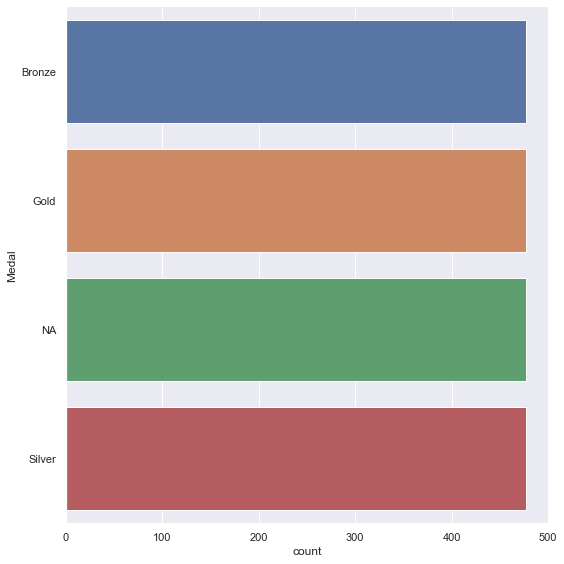

In [19]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (1431, 1) (1431, 6)
Test Set  : (477, 1) (477, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9825296995108316

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9769392033542977



<AxesSubplot:>

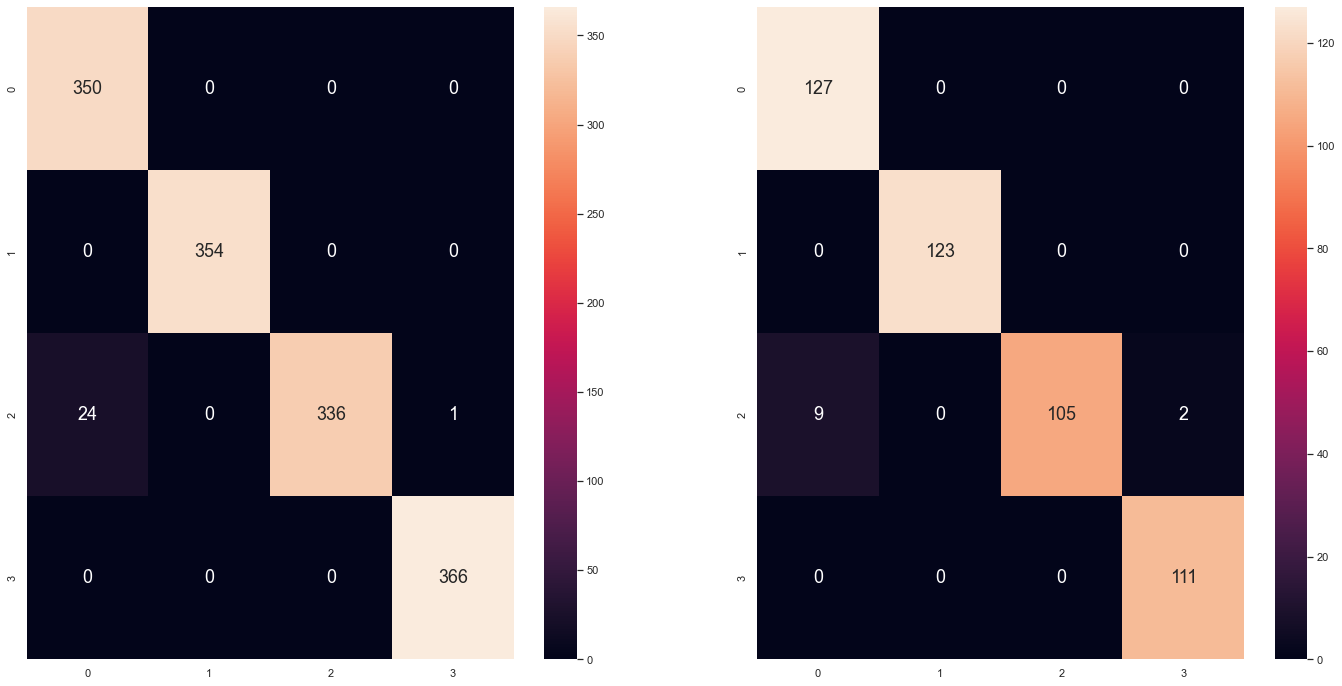

In [20]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 6)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

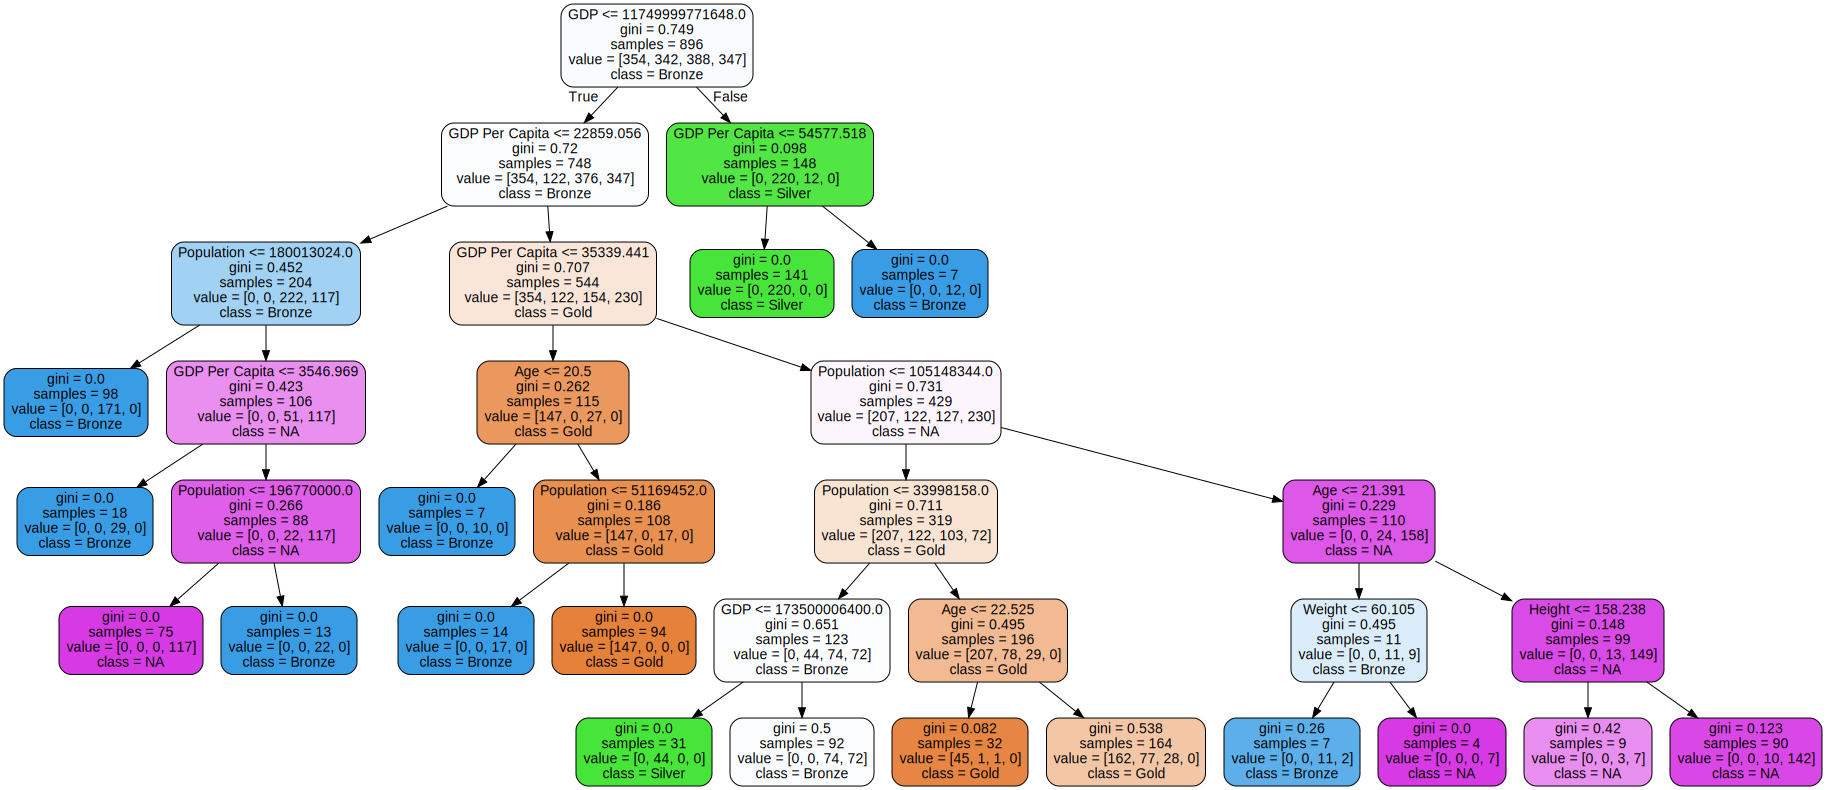

In [21]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [22]:
graph.render("Tree_female_swim")

'Tree_female_swim.pdf'

### Predictions

In [23]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.9099099099099099


<AxesSubplot:>

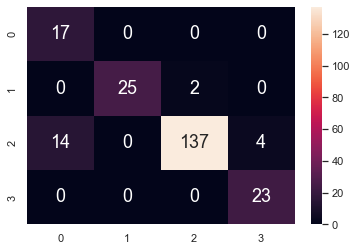

In [24]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})